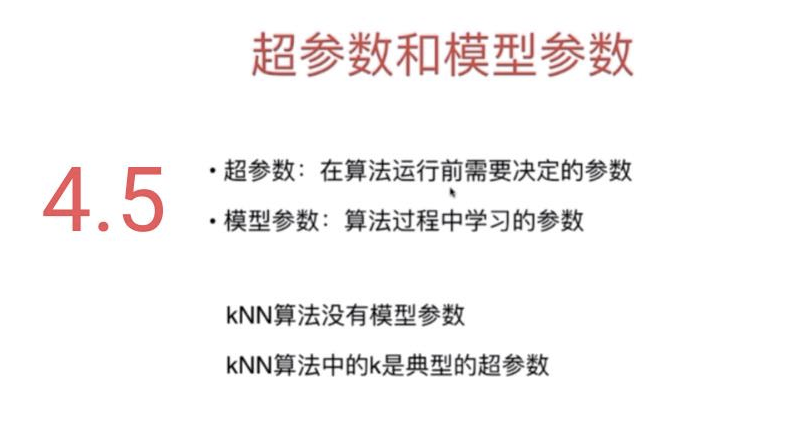

### 寻找好的超参数

> 领域知识

> 经验数值

> 实验搜索

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### 寻找最好的k

In [7]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("best_k =", best_k)
print("best_score =", best_score)

best_k = 4
best_score = 0.9916666666666667


### 考虑距离

 > 距离的倒数判断
* 可解决平票的情况

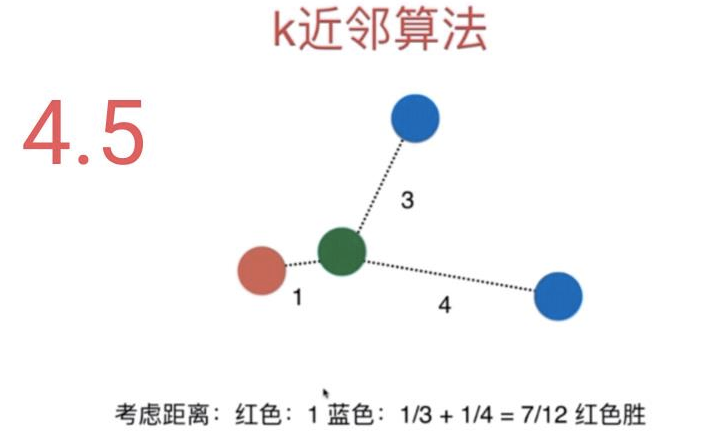

### 考虑距离？不考虑距离？

In [8]:
best_method = ""
best_score = 0.0
best_k = -1

for method in ["uniform", "distance"]:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
          best_k = k
          best_score = score
          best_method = method
 
print("best_method =", best_method)
print("best_k =", best_k)
print("best_score =", best_score)

best_method = uniform
best_k = 4
best_score = 0.9916666666666667


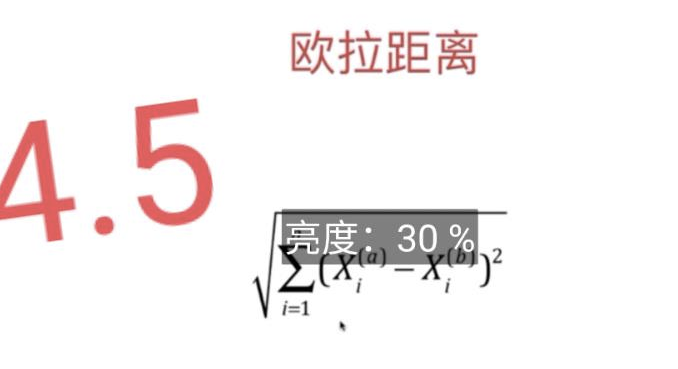



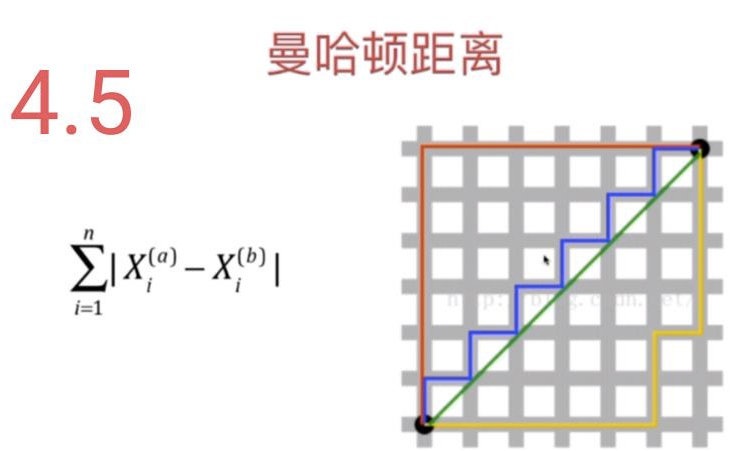

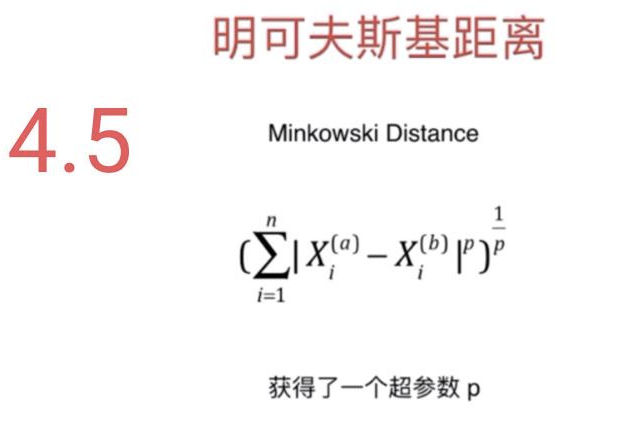


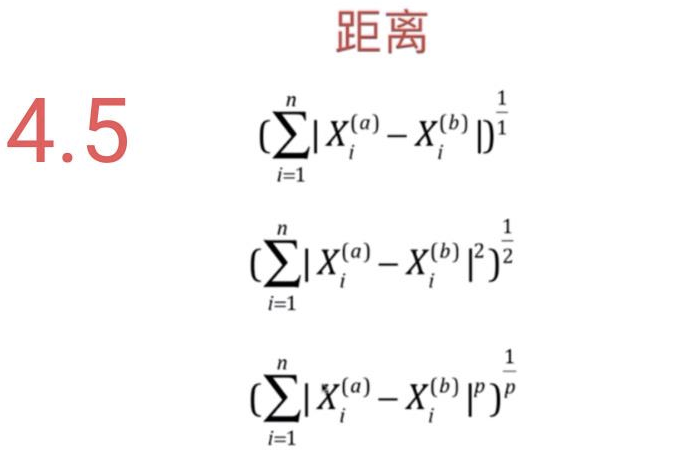


### 搜索明可夫斯基距离相应的p

In [10]:
%%time
best_p = -1
best_score = 0.0
best_k = -1

for k in range(1,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance")
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
          best_k = k
          best_score = score
          best_p = p
 
print("best_p =", p)
print("best_k =", best_k)
print("best_score =", best_score)

best_p = 5
best_k = 3
best_score = 0.9888888888888889
CPU times: user 2.97 s, sys: 32 ms, total: 3 s
Wall time: 3.03 s
